## 1. Packages

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from google.colab import drive
import sys
import importlib
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, BatchNormalization, ReLU
from tensorflow.keras import Sequential
import os
# reload kernel
%load_ext autoreload
%autoreload 2
importlib.reload(sys)

drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/nn_tf')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
%cd /content/drive/MyDrive/nn_tf

!git push -u origin main

/content/drive/MyDrive/nn_tf
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/Joel-Ajayi/NeuralNetwork_Scratch.git'


In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [ ]:
from model import NeuralNetwork
from layers.denseLayer import Dense
from layers.batchNormalization import BatchNorm
from layers.relu import Relu
from layers.dropout import Dropout


In [ ]:
dataset = DataLoader()

<a name='2'></a>
## 2 - Load and Process the Dataset

You'll be using the same "Cat vs non-Cat" dataset as in "Logistic Regression as a Neural Network" (Assignment 2). The model you built back then had 70% test accuracy on classifying cat vs non-cat images. Hopefully, your new model will perform even better!

**Problem Statement**: You are given a dataset ("data.h5") containing:
    - a training set of `m_train` images labelled as cat (1) or non-cat (0)
    - a test set of `m_test` images labelled as cat and non-cat
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB).

Let's get more familiar with the dataset. Load the data by running the cell below.

In [ ]:
train_3, test_3, shape_3, classes_3 = dataset.load_cats_dataset()

y = tf.Tensor(1, shape=(), dtype=int64). It's a cat picture.


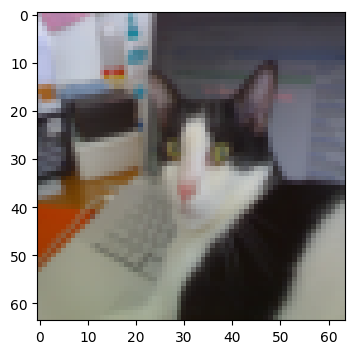

In [ ]:
# Example of a
index = 67
batch = train_3.batch(1).skip(index).take(1)
for img_batch, label_batch in batch:
    img = img_batch[0]
    img_label = label_batch[0][0]

plt.imshow(img)
print ("y = " + str(img_label) + ". It's a " + classes_3[img_label].decode("utf-8") +  " picture.")

NN from Scratch

In [ ]:
nn_cats = NeuralNetwork()

In [ ]:
nn_cats.assemble(input_shape=(train_3.cardinality().numpy(),tf.reduce_prod(shape_3).numpy()),
                 label_shape=1,
                 optimizer="adam",
                 decay_steps=500,
                 )

In [ ]:
nn_cats.Sequential([
    Dense(128, use_bias=False),
    BatchNorm(),
    Relu(),
    Dropout(0.4),

    Dense(64, use_bias=False),
    BatchNorm(),
    Relu(),
    Dropout(0.2),

    Dense(32, use_bias=False),
    BatchNorm(),
    Relu(),

    Dense(1, activation='sigmoid')
], batch_size=64)

Cost after epoch 1 : 0.0105340723
Cost after epoch 2 : 0.0105646448
Cost after epoch 3 : 0.00930712372
Cost after epoch 4 : 0.00883911364
Cost after epoch 5 : 0.00784346089
Cost after epoch 6 : 0.00805674121
Cost after epoch 7 : 0.00731965387
Cost after epoch 8 : 0.00735575752
Cost after epoch 9 : 0.00658136792
Cost after epoch 10 : 0.00647483254
Cost after epoch 11 : 0.00728784781
Cost after epoch 12 : 0.00682470668
Cost after epoch 13 : 0.00663525332
Cost after epoch 14 : 0.0059349467
Cost after epoch 15 : 0.00557714794
Cost after epoch 16 : 0.00519964704
Cost after epoch 17 : 0.0047665732
Cost after epoch 18 : 0.00436749309
Cost after epoch 19 : 0.0034744849
Cost after epoch 20 : 0.00395655073
Cost after epoch 21 : 0.00373200374
Cost after epoch 22 : 0.00412056362
Cost after epoch 23 : 0.00354572316
Cost after epoch 24 : 0.00403581746
Cost after epoch 25 : 0.00342142279
Cost after epoch 26 : 0.00267506624
Cost after epoch 27 : 0.00275653112
Cost after epoch 28 : 0.0028161935
Cost af

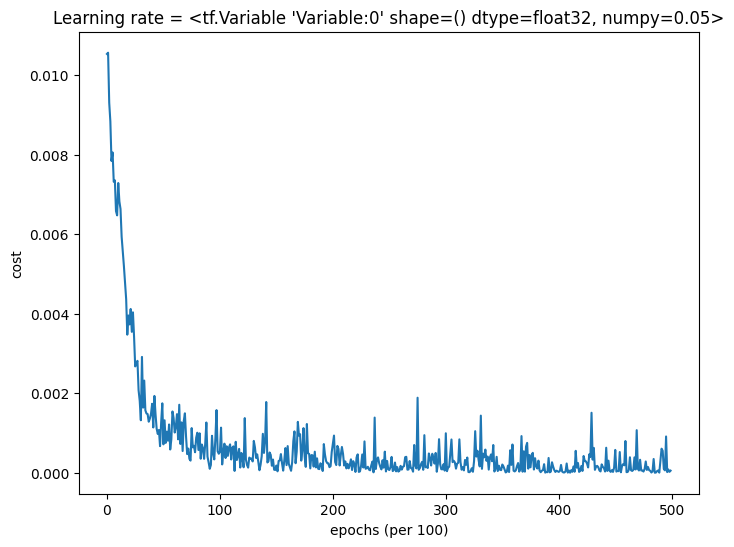

In [ ]:
nn_cats.fit_tf(train_3)

Tensorflow NN

In [ ]:
nn_cats_tf = Sequential([
    Conv2D(filters=32, kernel_size=(7,7), strides=(2,2), padding='same'),
    BatchNormalization(axis=3),
    ReLU(),
    MaxPool2D(pool_size=(8,8), strides=(8,8), padding='same'),
    Flatten(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(128),
    BatchNormalization(axis=1),
    ReLU(),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
epochs = 100
batch_size = 64
m = train_3.cardinality().numpy()
initial_learning_rate=1e-3
steps = m // batch_size
decay_steps = steps * 25
decay_rate = 1

# Define the learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=decay_steps ,  # Update after 700 steps
    decay_rate=decay_rate,
    staircase=True
)

In [ ]:
nn_cats_tf.compile(optimizer=tf.keras.optimizers.Adam(lr_schedule),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [ ]:
history_cats = nn_cats_tf.fit(train_3.batch(batch_size).prefetch(tf.data.AUTOTUNE), epochs=epochs)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 356ms/step - accuracy: 0.5623 - loss: 0.7269
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 545ms/step - accuracy: 0.7717 - loss: 0.5032
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 629ms/step - accuracy: 0.8381 - loss: 0.4151
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 342ms/step - accuracy: 0.8468 - loss: 0.3731
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 344ms/step - accuracy: 0.8871 - loss: 0.3188
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 351ms/step - accuracy: 0.9136 - loss: 0.2551
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 445ms/step - accuracy: 0.9314 - loss: 0.2384
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 650ms/step - accuracy: 0.9208 - loss: 0.2279
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 658ms/step - accuracy: 0.9588 - loss: 0.1848
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 398ms/step - accuracy: 0.9651 - loss: 0.1791
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 369ms/step - accuracy: 0.9788 - loss: 0.1395
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 357ms/step - accuracy:

In [ ]:
batch = test_3.batch(train_3.cardinality().numpy())

pred_tf = (nn_cats_tf.predict(test_3.batch(64)) >= 0.5).astype(int).flatten().tolist()

for img_batch, label_batch in batch:
    nn_cats.predict(img_batch, label_batch)
    img = img_batch
    img_label = label_batch
    img_label_pred = nn_cats.predict(img_batch, label_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Accuracy: 0.7599999904632568
(50, 1) (50, 64, 64, 3)
Accuracy: 0.7599999904632568


(1, 50)
y = tf.Tensor([0], shape=(1,), dtype=int64). It's a non-cat picture.
y_pred = tf.Tensor(1, shape=(), dtype=int32). It's a cat picture.
y_pred_tf = 0. It's a non-cat picture.


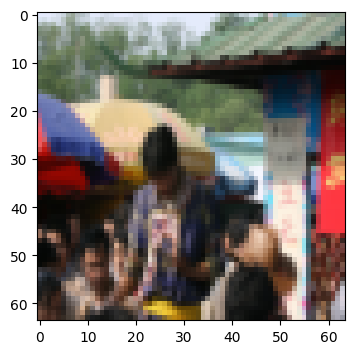

In [ ]:
# Example of a
print(img_label_pred.shape)

index = 34
plt.imshow(img[index])
print ("y = " + str(img_label[index]) + ". It's a " + classes_3[img_label[index][0]].decode("utf-8") +  " picture.")
print ("y_pred = " + str(img_label_pred[0][index]) + ". It's a " + classes_3[img_label_pred[0][index]].decode("utf-8") +  " picture.")
print ("y_pred_tf = " + str(pred_tf[index]) + ". It's a " + classes_3[pred_tf[index]].decode("utf-8") +  " picture.")

## <a name='4-1'></a>
### 4.1 - Load the SIGNS Dataset

As a reminder, the SIGNS dataset is a collection of 6 signs representing numbers from 0 to 5.

In [ ]:
selftrain_x_2, train_y_2, test_x_2, test_y_2, shape_2, classes_2 = train_x_2, train_y_2, test_x_2, test_y_2, shape_2, classes_2 = dataset.load_finger_signs_dataset()

train_x_2.shape, train_y_2.shape

train_x_2.shape, train_y_2.shape

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'datasets/test_signs.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
hand_index = 78
plt.imshow(train_x_2[:,hand_index].reshape(shape_2))